In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data,io
from skimage.util import img_as_float32

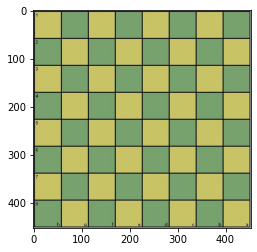

In [91]:
from skimage.draw import circle_perimeter
img1 = cv2.imread("chess.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)#转换为RGB
plt.imshow(img1)
plt.show()

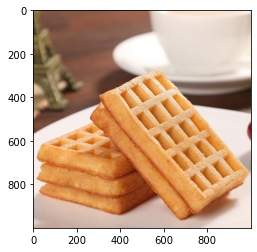

In [92]:
img2 = cv2.imread('huafu.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

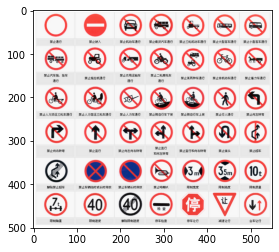

In [93]:
img3_org = cv2.imread('traffic.jpg')
img3 = cv2.cvtColor(img3_org, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

In [94]:
img_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)#转换为黑白图像
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)#转换为黑白图像
img_gray3 = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)#转换为黑白图像

## 1 Harris角点检测

In [72]:
def Harris(dest,img):
    dest[dest < 0.1 * np.max(dest)] = 0
    target = np.copy(img)
    for i in range(dest.shape[0]):
        for j in range(dest.shape[1]):
            if dest[i,j] > 0:
                circy, circx = circle_perimeter(i, j, 5, shape=dest.shape)
                target[circy,circx] = (0,255,0)
    plt.figure(figsize=(16,9))
    plt.imshow(target)
    plt.show()

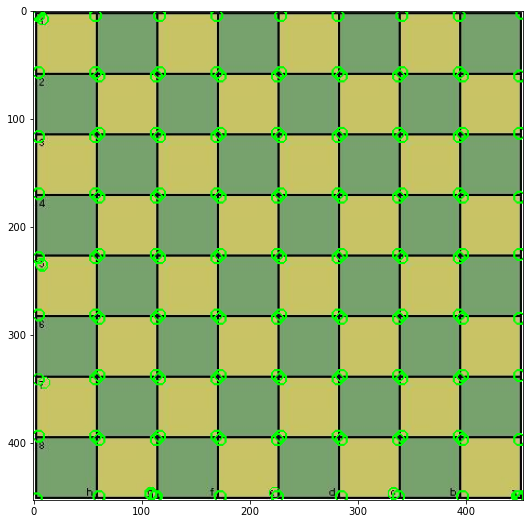

In [73]:
dest = cv2.cornerHarris(img_gray, 2, 3, 0.04)
Harris(dest,img1)

## 2 Shi-Tomasi角点检测

In [74]:
def Shi_Tomasi(corners,img):
    corners = np.int0(corners)
    for i in corners:
        x, y = i.ravel()
        cv2.circle(img, (x, y), 10, (255, 0, 0), 5)
    plt.imshow(img)
    plt.show()

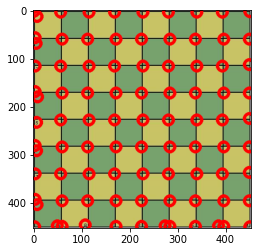

In [75]:
corners = cv2.goodFeaturesToTrack(img_gray, 100, 0.1, 10)
Shi_Tomasi(corners,img1)

## 3 FAST角点检测

In [76]:
def Fast(img,values):
    fast = cv2.FastFeatureDetector_create(values)
    kp = fast.detect(img, None)
    img_res = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
    plt.figure(figsize=(16,9))
    plt.imshow(img_res)
    plt.show()

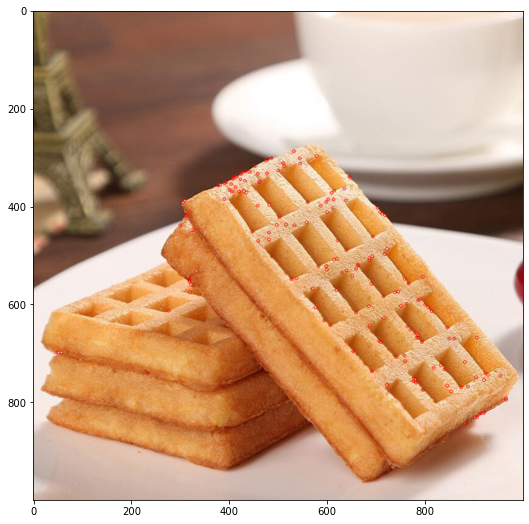

In [77]:
Fast(img2,50)

## 4 Canny边缘检测 

In [78]:
def Canny(edges):
    print(type(edges))
    print(edges)
    plt.figure(figsize=(16,9))
    plt.subplot(121),plt.imshow(img2)
    plt.title('Original Image')
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image')
    plt.show()

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


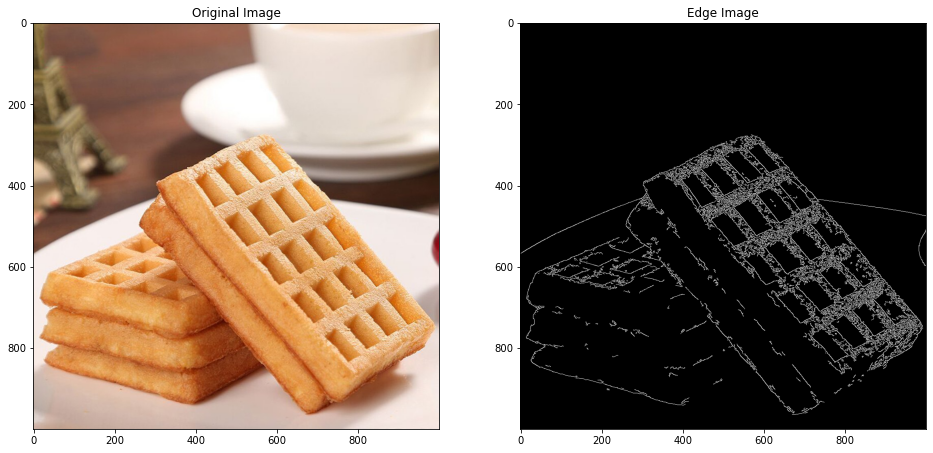

In [79]:
edges = cv2.Canny(img2,100,200)
Canny(edges)


## 5 霍夫变换 

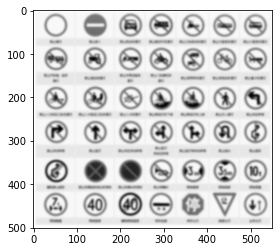

In [95]:
blurred = cv2.GaussianBlur(img_gray3,(11,11),0)#高斯模糊
plt.imshow(blurred,'gray')
plt.show()

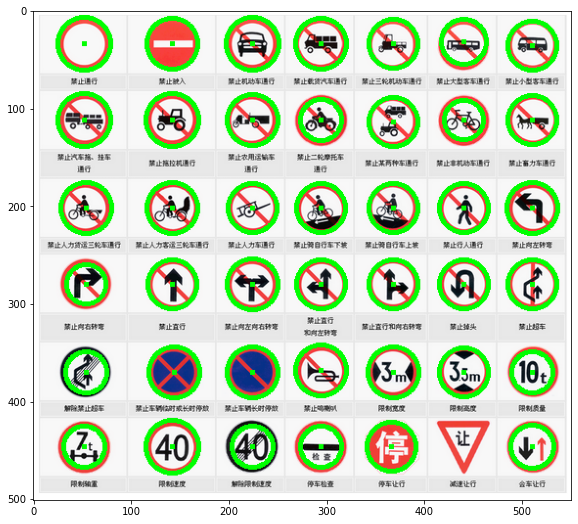

In [103]:
def Hough(img):
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 50, param1=100, param2=20, minRadius=20, maxRadius=50)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(img,(x, y), r, (0,255,0), 3)
            cv2.rectangle(img,(x - 2, y - 2), (x + 2, y + 2), (0,255,0), -1)
    plt.figure(figsize=(16,9))
    plt.imshow(img)
    plt.show()
Hough(img3)